Tên: Nguyễn Thọ Anh Khoa

Facebook: Khoa Nguyễn KT

Lớp: AI Insight 

# Softmax Regression - Exercises 2

In [ ]:
from IPython.core.display import display, HTML
display(HTML("<style>.rendered_html { font-size: 18px; }</style>"))

## 1) Xây dựng công thức tính forward và backward (tính đạo hàm cho từng tham số) ho bài toán softmax regression dùng phương pháp dựa trên hàm delta.

## a) Stochastic gradient descent

## b) Batch gradient descent


## a) Stochastic gradient descent


**n**: # of features

**N**: # of samples

**k**: # of classes

![image.png](attachment:image.png)

1/ Data 


$
\pmb{x} = 
\begin{pmatrix}
  x_0 \\
  x_1 \\
  ... \\
  x_n \\ 
\end{pmatrix}
,~~~~~
y=scalar
,~~~~~
\pmb{\theta}=
\begin{pmatrix}
    \pmb{\theta_1} & \pmb{\theta_2} & \pmb{\theta_k}
\end{pmatrix}=
\begin{pmatrix}
    b_1  & b_2  & ...  & b_k  \\
    w_{11} & w_{21} & ...  & w_{k1} \\
    ...  & ...   & ... & ...  \\
    w_{1n} & w_{2n}  & ... & w_{kn} \\
\end{pmatrix}
$

- **x_row:** số lượng features (x0 = 1)

- **x_col:** số lượng sample vì Stochastic nên = 1

- **$\pmb{\theta}$_row:** số lượng features

- **$\pmb{\theta}$_col:** số lượng classes

2/ Forward

- $\pmb{x_j ~~--\theta_i-->~~} z_i$ $,~~~~~$ $z_i = b_1 + w_{i1}x_1 + ... w_{i1}x_n$

=> $\pmb{z} = \pmb{\theta^Tx} = \begin{pmatrix}
z_1 \\
z_2 \\
... \\
z_k \\
\end{pmatrix}$

- $\hat{y_i} = \frac{\exp{z_i}}{\sum_{j=1}^{k}{\exp{z_j}}}$

=> $\pmb{\hat{y}} = \frac{\exp{\pmb{z}}}{\sum_{i=1}^{k}{\exp{z_i}}} = \begin{pmatrix}
\hat{y_1} \\
\hat{y_2} \\
... \\
\hat{y_k} \\
\end{pmatrix}$ 

- $\pmb{z}$ và $\pmb{y_k}$ có cùng shape
- row: số lượng class
- col: số lượng sample


Loss function: 

- $L(\pmb{\theta})= -\delta{(1,y)}\log(\hat{y_1}) - \delta{(2,y)}\log(\hat{y_2}) - ... -\delta{(k,y)}\log(\hat{y_k}) $ 

=> $L(\pmb{\theta})= - \sum_{i=1} ^{k} {\delta(i,y)\log(\hat{y_i})}$

3/ Backward

$\frac{\partial{L}}{\partial{w_{ij}}}$ = 
$\frac{\partial{L}}{\partial{\hat{y_{i^{'}}}}} *$ 
$\frac{\partial{\hat{y_{i^{'}}}}}{\partial{z_{i}}} *$ 
$\frac{\partial{z_{i}}}{\partial{w_{ij}}}$

$\frac{\partial{L}}{\partial{\hat{y_{i^{'}}}}} = \frac{1}{\hat{y_{i^{'}}}} $

$\frac{\partial{\hat{y_{i^{'}}}}}{\partial{z_{i}}}   = 
\begin{equation}
  \begin{cases}
    - \hat{y_{i^{'}}} + \hat{y_{i^{'}}}^2 & \text{$i = i^{'}$} \\
    - \hat{y_{i^{'}}}\hat{y_{i}} & \text{$i \neq i^{'}$}
  \end{cases}
\end{equation}
=~~~ \hat{y_{i^{'}}}(\hat{y_i} - \delta{(i,i^{'})})
$

$\frac{\partial{z_i}}{\partial{w_{ij}}} = x_j$

=> $\frac{\partial{L}}{\partial{w_{ij}}} = x_j(\hat{y_i} - \delta{(i,i^{'})}) $ 

=> $\frac{\partial{L}}{\partial{\pmb{\theta_i}}} = \pmb{x}(\hat{y_i} - \delta{(i,i^{'})}) $ 

**Vì $\hat{y_i}$ được cấu thành từ các z nên khi backprop phải đi qua các z và lấy sum do đó công thức cuối cùng là dot product.**

## b) Batch gradient descent


![image.png](attachment:image.png)

1/ Data 


$
\pmb{x} = 
\begin{pmatrix}
  x^{(1)}_0 & ... & x^{(N)}_0 \\
  x^{(1)}_1 & ... & x^{(N)}_1 \\
  ... & ... & ... \\
  x^{(1)}_n & ... & x^{(N)}_n\\ 
\end{pmatrix}
,~~~~~
\pmb{y}=\begin{pmatrix}
 y^{(1)} \\
 ... \\
 y^{(N)}
\end{pmatrix}
,~~~~~
\pmb{\theta}=
\begin{pmatrix}
    \pmb{\theta_1} & \pmb{\theta_2} & \pmb{\theta_k}
\end{pmatrix}=
\begin{pmatrix}
    b_1  & b_2  & ...  & b_k  \\
    w_{11} & w_{21} & ...  & w_{k1} \\
    ...  & ...   & ... & ...  \\
    w_{1n} & w_{2n}  & ... & w_{kn} \\
\end{pmatrix}
$

- **x_row:** số lượng features (x0 = 1)

- **x_col:** số lượng sample vì Batch nên lấy hết sample (N)

- **y_row:** số lượng output của sample vì Batch nên lấy hết sample (N)

- **$\pmb{\theta}$_row:** số lượng features

- **$\pmb{\theta}$_col:** số lượng classes

2/ Forward

- $\pmb{x_j ~~--\theta_i-->~~} z_i$ $,~~~~~$ $z_i = b_1 + w_{i1}x_1 + ... w_{i1}x_n$

=> $\pmb{z} = \pmb{\theta^Tx} = \begin{pmatrix}
z^{(1)}_1 & z^{(2)}_1 & ... & z^{(N)}_1 \\
z^{(1)}_2 & z^{(2)}_2 & ... & z^{(N)}_2\\
... \\
z^{(1)}_k & z^{(2)}_k & ... & z^{(N)}_k\\
\end{pmatrix}$

- $\hat{y_i} = \frac{\exp{z_i}}{\sum_{j=1}^{k}{\exp{z_j}}}$

=> $\pmb{\hat{y}} = \frac{\exp{\pmb{z}}}{\sum_{i=1}^{k}{\exp{z_i}}} = \begin{pmatrix}
\hat{y^{(1)}_1} & \hat{y^{(2)}_1} & ... & \hat{y^{(N)}_1} \\
\hat{y^{(1)}_2} & \hat{y^{(2)}_2} & ... & \hat{y^{(N)}_2} \\
... \\
\hat{y^{(1)}_k} & \hat{y^{(2)}_k} & ... & \hat{y^{(N)}_k} \\
\end{pmatrix}$ 

- $\pmb{z}$ và $\pmb{y_k}$ có cùng shape
- row: số lượng class
- col: số lượng sample


Loss function: 

- $L(\pmb{\theta})= -\delta{(1,y^{(u)})}\log(\hat{y_1}^{(u)}) - \delta{(2,y)}\log(\hat{y_2}^{(u)}) - ... -\delta{(k,y^{(u)})}\log(\hat{y_k}^{(u)}) $ 

=> $L(\pmb{\theta})= - \frac{1}{N} \sum_{u=1} ^{N} \sum_{i=1} ^{k} {\delta(i,y^{(u)})\log(\hat{y_i}^{(u)})}$

3/ Backward

=> $\frac{\partial{L}}{\partial{\pmb{\theta_i}}} = \frac{1}{N} \sum_{u=1} ^{N}  \pmb{x}(\hat{y_i}^{(u)} - \delta{(i,y^{(u)})}) $ 



## 2) Xây dựng công thức tính forward và backward (tính đạo hàm cho từng tham số) cho bài toán softmax regression dùng phương pháp dựa trên one-hot encoding. 

## a) Stochastic gradient descent 

## b) Batch gradient descent

## a) Stochastic gradient descent 



1/ Data 


$
\pmb{x} = 
\begin{pmatrix}
  x_0 \\
  x_1 \\
  ... \\
  x_n \\ 
\end{pmatrix}
,~~~~~
\pmb{y}= vector$ chỉ có 1 vị trí của label là 1 còn lại là 0 size là # classes
$
,~~~~~
\pmb{\theta}=
\begin{pmatrix}
    \pmb{\theta_1} & \pmb{\theta_2} & \pmb{\theta_k}
\end{pmatrix}=
\begin{pmatrix}
    b_1  & b_2  & ...  & b_k  \\
    w_{11} & w_{21} & ...  & w_{k1} \\
    ...  & ...   & ... & ...  \\
    w_{1n} & w_{2n}  & ... & w_{kn} \\
\end{pmatrix}
$

- **x_row:** số lượng features (x0 = 1)

- **x_col:** số lượng sample vì Stochastic nên = 1

- **$\pmb{\theta}$_row:** số lượng features

- **$\pmb{\theta}$_col:** số lượng classes

2/ Forward

- $\pmb{x_j ~~--\theta_i-->~~} z_i$ $,~~~~~$ $z_i = b_1 + w_{i1}x_1 + ... w_{i1}x_n$

=> $\pmb{z} = \pmb{\theta^Tx} = \begin{pmatrix}
z_1 \\
z_2 \\
... \\
z_k \\
\end{pmatrix}$

- $\hat{y_i} = \frac{\exp{z_i}}{\sum_{j=1}^{k}{\exp{z_j}}}$

=> $\pmb{\hat{y}} = \frac{\exp{\pmb{z}}}{\sum_{i=1}^{k}{\exp{z_i}}} = \begin{pmatrix}
\hat{y_1} \\
\hat{y_2} \\
... \\
\hat{y_k} \\
\end{pmatrix}$ 

- $\pmb{z}$ và $\pmb{y_k}$ có cùng shape
- row: số lượng class
- col: số lượng sample


Loss function: 

- $L(\pmb{\theta})= -y_1\log(\hat{y_1}) - y_2\log(\hat{y_2}) - ... -y_k\log(\hat{y_k}) $ 

=> $L(\pmb{\theta})= -\sum_{i=1} ^{k} {y_i\log(\hat{y_i})}$

3/ Backward

$\frac{\partial{L}}{\partial{w_{ij}}}$ = 
$\frac{\partial{L}}{\partial{\hat{y_{i^{'}}}}} *$ 
$\frac{\partial{\hat{y_{i^{'}}}}}{\partial{z_{i}}} *$ 
$\frac{\partial{z_{i}}}{\partial{w_{ij}}}$

$\frac{\partial{L}}{\partial{\hat{y_{i^{'}}}}} = \frac{1}{\hat{y_{i^{'}}}} $

$\frac{\partial{\hat{y_{i^{'}}}}}{\partial{z_{i}}}   = 
\begin{equation}
  \begin{cases}
    - \hat{y_{i^{'}}} + \hat{y_{i^{'}}}^2 & \text{$i = i^{'}$} \\
    - \hat{y_{i^{'}}}\hat{y_{i}} & \text{$i \neq i^{'}$}
  \end{cases}
\end{equation}
=~~~ \hat{y_{i^{'}}}(\hat{y_i} - y_i)
$

$\frac{\partial{z_i}}{\partial{w_{ij}}} = x_j$

=> $\frac{\partial{L}}{\partial{w_{ij}}} = x_j(\hat{y_i} - y_i) $ 

=> $\frac{\partial{L}}{\partial{\pmb{\theta_i}}} = \pmb{x}(\hat{y_i} - y_i) $ 

**Vì $\hat{y_i}$ được cấu thành từ các z nên khi backprop phải đi qua các z và lấy sum do đó công thức cuối cùng là dot product.**

## b) Batch gradient descent



1/ Data 


$
\pmb{x} = 
\begin{pmatrix}
  x^{(1)}_0 & ... & x^{(N)}_0 \\
  x^{(1)}_1 & ... & x^{(N)}_1 \\
  ... & ... & ... \\
  x^{(1)}_n & ... & x^{(N)}_n\\ 
\end{pmatrix}
,~~~~~
\pmb{y}=\begin{pmatrix}
 y^{(1)} \\
 ... \\
 y^{(N)}
\end{pmatrix}
$
mỗi element là 1 vector và trong mỗi vector chỉ có 1 vị trí của label là 1 còn lại là 0 size là # classes
$
,~~~~~
\pmb{\theta}=
\begin{pmatrix}
    \pmb{\theta_1} & \pmb{\theta_2} & \pmb{\theta_k}
\end{pmatrix}=
\begin{pmatrix}
    b_1  & b_2  & ...  & b_k  \\
    w_{11} & w_{21} & ...  & w_{k1} \\
    ...  & ...   & ... & ...  \\
    w_{1n} & w_{2n}  & ... & w_{kn} \\
\end{pmatrix}
$

- **x_row:** số lượng features (x0 = 1)

- **x_col:** số lượng sample vì Batch nên lấy hết sample (N)

- **y_row:** số lượng output của sample vì Batch nên lấy hết sample (N)

- **$\pmb{\theta}$_row:** số lượng features

- **$\pmb{\theta}$_col:** số lượng classes

2/ Forward

- $\pmb{x_j ~~--\theta_i-->~~} z_i$ $,~~~~~$ $z_i = b_1 + w_{i1}x_1 + ... w_{i1}x_n$

=> $\pmb{z} = \pmb{\theta^Tx} = \begin{pmatrix}
z^{(1)}_1 & z^{(2)}_1 & ... & z^{(N)}_1 \\
z^{(1)}_2 & z^{(2)}_2 & ... & z^{(N)}_2\\
... \\
z^{(1)}_k & z^{(2)}_k & ... & z^{(N)}_k\\
\end{pmatrix}$

- $\hat{y_i} = \frac{\exp{z_i}}{\sum_{j=1}^{k}{\exp{z_j}}}$

=> $\pmb{\hat{y}} = \frac{\exp{\pmb{z}}}{\sum_{i=1}^{k}{\exp{z_i}}} = \begin{pmatrix}
\hat{y^{(1)}_1} & \hat{y^{(2)}_1} & ... & \hat{y^{(N)}_1} \\
\hat{y^{(1)}_2} & \hat{y^{(2)}_2} & ... & \hat{y^{(N)}_2} \\
... \\
\hat{y^{(1)}_k} & \hat{y^{(2)}_k} & ... & \hat{y^{(N)}_k} \\
\end{pmatrix}$ 

- $\pmb{z}$ và $\pmb{y_k}$ có cùng shape
- row: số lượng class
- col: số lượng sample


Loss function: 

- $L(\pmb{\theta})= -y^{(u)}_1\log(\hat{y_1}^{(u)}) - y^{(u)}_2\log(\hat{y_2}^{(u)}) - ... -y^{(u)}_k\log(\hat{y_k}^{(u)}) $ 

=> $L(\pmb{\theta})= - \frac{1}{N} \sum_{u=1} ^{N} \sum_{i=1} ^{k} {y^{(u)}_i\log(\hat{y_i}^{(u)})}$

3/ Backward

=> $\frac{\partial{L}}{\partial{\pmb{\theta_i}}} = \frac{1}{N} \sum_{u=1} ^{N}   \pmb{x}(\hat{y_i}^{(u)} - y^{(u)}_i) $ 



## 3) Cài đặt bài toán softmax regression cho data ‘iris_1D_2c.csv’ bằng phương pháp dựa vào one-hot encoding. 

## a) Stochastic gradient descent

## b) Batch gradient descent

## a) Stochastic gradient descent


[[0. 0.]
 [1. 0.]
 [2. 0.]
 [3. 1.]
 [4. 1.]
 [5. 1.]]
[[0 0]
 [1 0]
 [2 0]
 [3 1]
 [4 1]
 [5 1]]
accuracy = 1.0


<function matplotlib.pyplot.show>

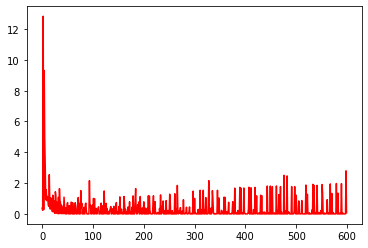

In [10]:
import numpy as np
import matplotlib.pyplot as plt
# load data
iris_1d_2c = np.genfromtxt('iris_1D_2c.csv', dtype=None, delimiter=',', skip_header=1)
X = iris_1d_2c[:, :1]
y = iris_1d_2c[:, 1]

def normalize_data(X):
    max_X = np.max(X, axis=0)
    min_X = np.min(X, axis=0)
    return (X-min_X)/(max_X-min_X)

def one_hot_label(y):
    num_classes = len(np.unique(y))
    num_samples = len(y)
    new_y = np.zeros((num_samples, num_classes))
    idx_mat = np.asarray(list(enumerate(y)))
    print(idx_mat)
    new_y[idx_mat[:,0].astype(np.int32), idx_mat[:,1].astype(np.int32)] = 5
    print(idx_mat.astype(np.int32))
    return new_y.astype(np.int32)

# prepare data
X = normalize_data(X)
num_samples = X.shape[0]
intecept = np.ones((num_samples,1))
X = np.concatenate([intecept, X], axis=1)
X=X.T
y_one_hot = one_hot_label(y)

# initial
D = X.shape[0]
C = len(np.unique(y))
theta = np.random.randn(D, C)
lr = 0.1
epochs=100
idxs = np.arange(num_samples)
losses=[]

for i in range(epochs):
    # shuffle data
    np.random.shuffle(idxs)
    X = X[:, idxs]
    y_one_hot = y_one_hot[idxs, :]
    for j in range(num_samples):
        # compute score
        x = X[:, j:j+1]
        y_one_hot_sample = y_one_hot[j:j+1]
        z = np.dot(theta.T, x)
        # compute prob
        exp_z = np.exp(z)
        prob = exp_z/np.sum(exp_z, axis=0, keepdims=True)
        # compute loss
        loss = - np.dot(y_one_hot_sample,np.log(prob))
        losses.append(np.squeeze(loss))
        # compute grad
        
        dtheta = np.dot(x, prob.T-y_one_hot_sample)
        # update weight
        theta += -lr*dtheta
        
        
    

p_socre = np.dot(theta.T, X)
p_classes = np.argmax(p_socre, axis=0)
gt_classes = np.argmax(y_one_hot, axis=1)
print('accuracy = {}'.format(np.mean(p_classes==gt_classes)))

plt.plot(np.arange(len(losses)), losses, color='r')
plt.show


## b) Batch gradient descent

[[0. 0.]
 [1. 0.]
 [2. 0.]
 [3. 1.]
 [4. 1.]
 [5. 1.]]
[[5 0]
 [5 0]
 [5 0]
 [0 5]
 [0 5]
 [0 5]]
accuracy = 1.0


<function matplotlib.pyplot.show>

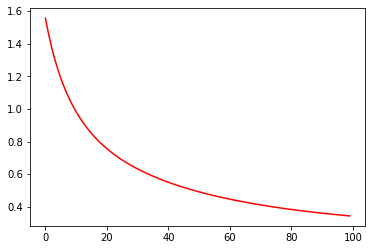

In [11]:
import numpy as np
import matplotlib.pyplot as plt
# load data
iris_1d_2c = np.genfromtxt('iris_1D_2c.csv', dtype=None, delimiter=',', skip_header=1)
X = iris_1d_2c[:, :1]
y = iris_1d_2c[:, 1]

def normalize_data(X):
    max_X = np.max(X, axis=0)
    min_X = np.min(X, axis=0)
    return (X-min_X)/(max_X-min_X)

def one_hot_label(y):
    num_classes = len(np.unique(y))
    num_samples = len(y)
    new_y = np.zeros((num_samples, num_classes))
    idx_mat = np.asarray(list(enumerate(y)))
    print(idx_mat)
    new_y[idx_mat[:,0].astype(np.int32), idx_mat[:,1].astype(np.int32)] = 5
    print(new_y.astype(np.int32))
    return new_y.astype(np.int32)

# prepare data
X = normalize_data(X)
num_samples = X.shape[0]
intecept = np.ones((num_samples,1))
X = np.concatenate([intecept, X], axis=1)
X=X.T
y_one_hot = one_hot_label(y)

# initial
D = X.shape[0]
C = len(np.unique(y))
theta = np.random.randn(D, C)
lr = 0.1
epochs=100
idxs = np.arange(num_samples)
losses=[]

for i in range(epochs):
    # shuffle data
    np.random.shuffle(idxs)
    X = X[:, idxs]
    y_one_hot = y_one_hot[idxs, :]

    # compute score
    Z = np.dot(theta.T, X)
    # compute prob
    exp_z = np.exp(Z)
    prob = exp_z/np.sum(exp_z, axis=0, keepdims=True)
    # compute loss
    loss = - np.dot(y_one_hot,np.log(prob))
    loss = np.sum(loss*np.eye(num_samples))/num_samples
    losses.append(np.squeeze(loss))
    # compute grad

    dtheta = np.dot(X, prob.T-y_one_hot)/num_samples
    # update weight
    theta += -lr*dtheta
        
        
p_socre = np.dot(theta.T, X)
p_classes = np.argmax(p_socre, axis=0)
gt_classes = np.argmax(y_one_hot, axis=1)
print('accuracy = {}'.format(np.mean(p_classes==gt_classes)))

plt.plot(np.arange(len(losses)), losses, color='r')
plt.show


## 4) Cài đặt bài toán softmax regression cho data ‘iris_full.csv’ bằng phương pháp dựa vào one-hot encoding.

## a) Stochastic gradient descent

## b) Batch gradient descent

## a) Stochastic gradient descent


y one hot [[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]


<function matplotlib.pyplot.show>

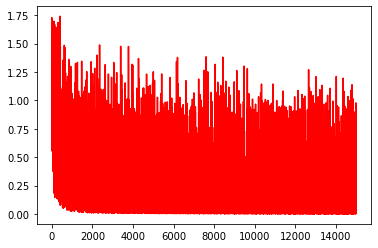

In [4]:
import numpy as np
import matplotlib.pyplot as plt
# load data
iris_full = np.genfromtxt('iris_full.csv', dtype=None, delimiter=',', skip_header=1)
X = iris_full[:, :4]
y = iris_full[:, 4]

def normalize_data(X):
    max_X = np.max(X, axis=0)
    min_X = np.min(X, axis=0)
    return (X-min_X)/(max_X-min_X)

def one_hot_label(y):
    num_classes = len(np.unique(y))
    num_samples = len(y)
    new_y = np.zeros((num_samples, num_classes))
    idx_mat = np.asarray(list(enumerate(y)))
    new_y[idx_mat[:,0].astype(np.int32), idx_mat[:,1].astype(np.int32)] = 1
    print("y one hot", new_y.astype(np.int32))
    return new_y.astype(np.int32)

# prepare data
X = normalize_data(X)
num_samples = X.shape[0]
intecept = np.ones((num_samples,1))
X = np.concatenate([intecept, X], axis=1)
X=X.T
y_one_hot = one_hot_label(y)

# initial
D = X.shape[0]
C = len(np.unique(y))
theta = np.random.randn(D, C)
lr = 0.1
epochs=100
idxs = np.arange(num_samples)
losses=[]

for i in range(epochs):
    # shuffle data
    np.random.shuffle(idxs)
    X = X[:, idxs]
    y_one_hot = y_one_hot[idxs, :]
    for j in range(num_samples):
        # compute score
        x = X[:, j:j+1]
        y_one_hot_sample = y_one_hot[j:j+1]
        z = np.dot(theta.T, x)
        # compute prob
        exp_z = np.exp(z)
        prob = exp_z/np.sum(exp_z, axis=0, keepdims=True)
        # compute loss
        loss = - np.dot(y_one_hot_sample,np.log(prob))
        losses.append(np.squeeze(loss))
        # compute grad
        
        dtheta = np.dot(x, prob.T-y_one_hot_sample)
        # update weight
        theta += -lr*dtheta
        
        
    

p_socre = np.dot(theta.T, X)
p_classes = np.argmax(p_socre, axis=0)
gt_classes = np.argmax(y_one_hot, axis=1)
print('accuracy = {}'.format(np.mean(p_classes==gt_classes)))

plt.plot(np.arange(len(losses)), losses, color='r')
plt.show

## b) Batch gradient descent

accuracy = 0.9466666666666667


<function matplotlib.pyplot.show(*args, **kw)>

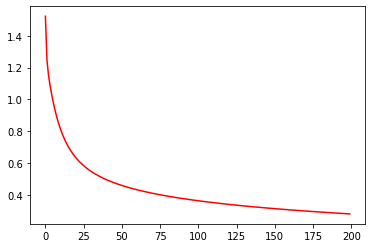

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# load data
iris_full = np.genfromtxt('iris_full.csv', dtype=None, delimiter=',', skip_header=1)
X = iris_full[:, :4]
y = iris_full[:, 4]
def normalize_data(X):
    max_X = np.max(X, axis=0)
    min_X = np.min(X, axis=0)
    return (X-min_X)/(max_X-min_X)

def one_hot_label(y):
    num_classes = len(np.unique(y))
    num_samples = len(y)
    new_y = np.zeros((num_samples, num_classes))
    idx_mat = np.asarray(list(enumerate(y)))
    new_y[idx_mat[:,0].astype(np.int32), idx_mat[:,1].astype(np.int32)] = 1
    return new_y.astype(np.int32)

# prepare data
X = normalize_data(X)
num_samples = X.shape[0]
intecept = np.ones((num_samples,1))
X = np.concatenate([intecept, X], axis=1)
X=X.T
y_one_hot = one_hot_label(y)

# initial
D = X.shape[0]
C = len(np.unique(y))
theta = np.random.randn(D, C)
lr = 1
epochs=200
idxs = np.arange(num_samples)
losses=[]

for i in range(epochs):
    # shuffle data
    np.random.shuffle(idxs)
    X = X[:, idxs]
    y_one_hot = y_one_hot[idxs, :]

    # compute score
    Z = np.dot(theta.T, X)
    # compute prob
    exp_z = np.exp(Z)
    prob = exp_z/np.sum(exp_z, axis=0, keepdims=True)
    # compute loss
    loss = - np.dot(y_one_hot,np.log(prob))
    loss = np.sum(loss*np.eye(num_samples))/num_samples
    losses.append(np.squeeze(loss))
    # compute grad

    dtheta = np.dot(X, prob.T-y_one_hot)/num_samples
    # update weight
    theta += -lr*dtheta
        
        
p_socre = np.dot(theta.T, X)
p_classes = np.argmax(p_socre, axis=0)
gt_classes = np.argmax(y_one_hot, axis=1)
print('accuracy = {}'.format(np.mean(p_classes==gt_classes)))

plt.plot(np.arange(len(losses)), losses, color='r')
plt.show
